In [6]:
# solution for question 7.

#import packages
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
from random import randrange
import random

#Here we assume X8 is the labels and X0-X7 is the features (contrary to the exam text)
def loaddata(filename):

    # Load data set from CSV file
    Xt = np.loadtxt(filename, delimiter=',')

    # Split into data matrix and target vector
    X = Xt[:,-1]
    t = Xt[:,:-1]
    
    return t, X

# load file
t, X = loaddata('data/seedsDataset.txt')


In [7]:
def normalize(data):
    meanStorage = np.zeros((1,len(data[0])), dtype=([('deviation', float), ('mean', float)]))
    normData = np.copy(data)
    for i in range(len(t[0])):
        meanStorage[0][i]['mean'] = np.mean(data[:,i])
        meanStorage[0][i]['deviation'] = stat.stdev(data[:,i])
        for j in range(len(t)):
            normData[j][i] = (data[j][i] - meanStorage[0][i]['mean']) / meanStorage[0][i]['deviation']
    return normData

normalized = normalize(t)
print(normalized)

[[ 0.12230257  0.19653538 -0.01321549 ...  0.12133461 -0.9925311
  -0.38662822]
 [-0.00634788 -0.00728468  0.40784584 ...  0.17609556 -1.80624695
  -0.91775791]
 [-0.20609464 -0.36963145  1.40421868 ...  0.18652621 -0.66920925
  -1.18131091]
 ...
 [-0.85611796 -0.83766269 -0.60937162 ... -0.79656316  0.1560055
  -0.82722444]
 [-0.91705765 -1.04148275  0.29111596 ... -0.74180221 -0.0387993
  -1.09077744]
 [-1.24206932 -1.28304726 -0.84283137 ... -1.22682774  0.43062614
  -0.82320073]]


def generateCentroids(K, samples):
    #generate array to save values
    sumArray = np.zeros((K, len(samples[0])))
    n = len(samples)
    for i in range(n):
        sumArray[samples[i]['centroid']] += samples[i]['val'] / n
    # for j in range(K):
    #     if (sumArray[j] == 0):
    #         sumArray[j] = None
    return sumArray

def calc_mean(cen, assigned_to, samples):
    rows = np.count_nonzero(assigned_to == cen)
    tmp = np.zeros((rows,7))
    index = 0
    for i in range(samples.shape[0]):
        if assigned_to[i] == cen:
            tmp[index] = samples[i]
            index = index + 1
    return np.mean(tmp, axis=0)

In [8]:
#my solution (not working)


def generateCentroids(K, samples):
    #generate array to save values
    sumArray = np.zeros((K, len(samples[0])))
    n = len(samples)
    for i in range(n):
        sumArray[samples[i]['centroid']] += samples[i]['val']
    for j in range(K):
        sumArray[j] = sumArray[j] / n
    
    # sumArray = sumArray / n
    print('sumarray',sumArray)
    # for j in range(K):
    #     if (sumArray[j] == 0):
    #         sumArray[j] = None
    return sumArray

def find_Closest(K, centroids, clustered):
    for i in range(len(clustered)):
        tempDist = np.linalg.norm(clustered[i]['val'] - centroids[clustered[i]['centroid']])
        for j in range(K):
            if (np.linalg.norm(clustered[i]['val'] - centroids[j]) <= tempDist):
                tempDist = np.linalg.norm(clustered[i]['val'] - centroids[j])
                clustered[i]['centroid'] = j
    return clustered

def K_Clustering(K, samples, labels):
    n = len(samples)
    m = len(samples[0])

    #generating K centroids
    centroids = np.zeros((K, m))
    random_row = random.sample(range(n), K)
    for i in range(K):
        centroids[i] = samples[random_row[i]]

    #expand samples to tuples
    clustered = np.zeros((n, m), dtype=([('val', float), ('centroid', int), ('label', int)]))
    for j in range(n):
        clustered[j]['val'] = samples[j]
        #temp closest centroid
        clustered[j]['centroid'] = 0
        clustered[j]['label'] = labels[j]
    #find closest centroid using euclidian distance
    clustered = find_Closest(K, centroids, clustered)
    old_clustering = np.copy(clustered)
    centroids = generateCentroids(K, clustered)
    clustered = find_Closest(K, centroids, clustered)
    #implemented a counter to prevent infinite loops
    counter = 0
    while (np.any(clustered['centroid'] != old_clustering['centroid']) and counter < 10000):
        centroids = generateCentroids(K, clustered)
        old_clustering = np.copy(clustered)
        clustered = find_Closest(K, centroids, clustered)
        counter += 1
    return clustered, centroids   

#clustered1, centroids1 = K_Clustering(5, normalized, X)
clustered2, centroids2 = K_Clustering(3, normalized, X)

def find_intraCluster(cluster1, centroids1, cluster2, centroids2):
    distance = np.zeros(2)
    for i in range(len(cluster1)):
        distance[0] += np.linalg.norm(cluster1[i]['val'] - centroids1[cluster1[i]['centroid']])
    for j in range(len(cluster2)):
        distance[1] += np.linalg.norm(cluster2[i]['val'] - centroids2[cluster2[i]['centroid']])
    return np.argmin(distance)

def print_Clusters(K, samples, centroids):
    countList = np.zeros(K)
    for i in range(len(samples)):
        countList[samples[i]['centroid']] += 1
    for j in range(K):
        print(countList[j], 'samples in cluster', j)

bestK = find_intraCluster(clustered1, centroids1, clustered2, centroids2)
if (bestK == 0):
    print('Best K is 5')
    print_Clusters(5, clustered1, centroids1)
else:
    print('Best K is 3')
    print_Clusters(3, clustered2, centroids2)


sumarray [[-0.17544282 -0.15703769 -0.17836533 -0.12835485 -0.19074933 -0.0895499
  -0.14381996]
 [-0.24557424 -0.2620639  -0.05632592 -0.27375928 -0.21443318  0.13639889
  -0.2594131 ]
 [ 0.42101706  0.4191016   0.23469125  0.40211413  0.4051825  -0.04684898
   0.40323306]]
sumarray [[-0.04544027 -0.03838554 -0.03437132 -0.03048536 -0.04577272 -0.14061919
  -0.07331275]
 [-0.38254465 -0.38921516 -0.2036165  -0.37970751 -0.36643287  0.19889877
  -0.33187307]
 [ 0.42798492  0.4276007   0.23798782  0.41019286  0.41220559 -0.05827958
   0.40518582]]
sumarray [[-0.01710332 -0.01920079  0.07509712 -0.03220273  0.0080526  -0.16576047
  -0.10551651]
 [-0.40570808 -0.40461886 -0.2912575  -0.37832007 -0.4079285   0.19854394
  -0.31268475]
 [ 0.4228114   0.42381965  0.21616038  0.41052281  0.39987591 -0.03278347
   0.41820126]]
sumarray [[-0.01027722 -0.01663153  0.11140136 -0.04221574  0.02565511 -0.16696725
  -0.1129136 ]
 [-0.40777114 -0.40416461 -0.30779083 -0.37282408 -0.41493621  0.1903687

NameError: name 'clustered1' is not defined

In [9]:

#given solution

def normalize_data(samples): 
    # Find means of columns
    means = samples.mean(axis=0)
    deviations = []
    # Find sample standard deviations
    for column in samples.T:
        ssd = stat.stdev(column)
        deviations.append(ssd)
    normalized = np.zeros((200, 7))
    rows, cols = normalized.shape[0], normalized.shape[1]
    # Normalize all of the data.
    for i in range(rows):
        for j in range(cols):
            normalized[i, j] = (samples[i, j] - means[j]) / deviations[j]
    return normalized

# This function will the values of a single centroid,
# when samples have been classified differently
def calc_mean(cen, assigned_to, samples):
    rows = np.count_nonzero(assigned_to == cen)
    tmp = np.zeros((rows,7))
    index = 0
    for i in range(samples.shape[0]):
        if assigned_to[i] == cen:
            tmp[index] = samples[i]
            index = index + 1
    return np.mean(tmp, axis=0)

# This function will do a single k-means run until assigned clusters are the same
def k_means(samples):
    clusters = 3
    centroids = np.zeros((clusters, 7))
    rows = samples.shape[0]
    # Create random centroids
    for i in range(clusters):
        random_row = np.random.randint(rows-1)
        centroids[i] = samples[random_row]
    # Keep values of old and new centroids (for later comparison)
    assigned_to_old = np.zeros(200)
    assigned_to_new = np.zeros(200)
    while(1):
        # Assign each sample to a cluster
        for row in range(rows):
            distances = np.zeros(3)
            # Find distances to each cluster (euclid distance)
            for j in range(clusters):
                distances[j] = (np.linalg.norm(samples[row]-centroids[j]))
            # Find the closest cluster and assign sample to it
            closest = np.argmin(distances)
            assigned_to_new[row] = closest
        # If old and new assigned samples are equal, stop k-means
        if np.array_equal(assigned_to_old, assigned_to_new):
            return centroids, assigned_to_new
        # Calculate new centroids based on assigned new clusters
        for cen in range(clusters):
            centroids[cen] = calc_mean(cen, assigned_to_new, samples)
        # Copy newly assigned to old (use '[:]' to copy for np arrays)
        assigned_to_old[:] = assigned_to_new



# Run k-means 5 times and select best values
def k_means_intra(samples):
    # Set initial parameters for how many k-means should be run
    iterations = 5
    optimal_dist = 10000000000.0 # Set to unreasonably high distance (we have small distances)
    optimal_clusters = np.zeros((3, 7))
    optimal_assigned = np.zeros(200)
    for i in range(iterations):
        # Run k-means and get return values
        centroids, assigned_to = k_means(samples)
        rows = samples.shape[0]
        intra_cluster_dist = 0
        # Find the intra-cluster distance for each cluster
        for classes in range(3):
            cluster_dist = 0
            for i in range(1):
                for j in range(rows):
                    if assigned_to[i] == assigned_to[j]:
                        cluster_dist = cluster_dist + np.linalg.norm(samples[i]-samples[j])
        # The divide by 69 is only relevant in our case, where we have 70 samples in each cluster
        intra_cluster_dist = intra_cluster_dist + (cluster_dist / 69)
        # Update values of best k-means run if needed.
        if intra_cluster_dist < optimal_dist:
            optimal_dist = intra_cluster_dist
            optimal_clusters[:] = centroids
            optimal_assigned[:] = assigned_to
    return optimal_clusters, optimal_assigned, optimal_dist

newt = normalize(t)


testClust, testAssign, testDist = k_means_intra(newt)

In [10]:
import numpy.matlib


def pca(data): 
    meanTrainingFeatures = np.mean(data.T, axis = 1)

    data_cent = data.T - meanTrainingFeatures.reshape((-1, 1))
    data_cent = np.cov(data_cent)
    PCevals, PCevecs = np.linalg.eigh(data_cent)
    PCevals = np.flip(PCevals, 0)
    PCevecs = np.flip(PCevecs, 1)
    return PCevals, PCevecs


PCevals, PCevecs = pca(normalized)
#testNorm = normalize_data(testClust)
#PCevals1, PCevecs1 = pca(testClust)
print(clustered2)
PCevals1, PCevecs1 = pca(centroids2)

print(PCevecs)

[[( 0.12230257, 0, 1) ( 0.19653538, 0, 1) (-0.01321549, 0, 1) ...
  ( 0.12133461, 0, 1) (-0.9925311 , 0, 1) (-0.38662822, 0, 1)]
 [(-0.00634788, 0, 1) (-0.00728468, 0, 1) ( 0.40784584, 0, 1) ...
  ( 0.17609556, 0, 1) (-1.80624695, 0, 1) (-0.91775791, 0, 1)]
 [(-0.20609464, 0, 1) (-0.36963145, 0, 1) ( 1.40421868, 0, 1) ...
  ( 0.18652621, 0, 1) (-0.66920925, 0, 1) (-1.18131091, 0, 1)]
 ...
 [(-0.85611796, 1, 3) (-0.83766269, 1, 3) (-0.60937162, 1, 3) ...
  (-0.79656316, 1, 3) ( 0.1560055 , 1, 3) (-0.82722444, 1, 3)]
 [(-0.91705765, 1, 3) (-1.04148275, 1, 3) ( 0.29111596, 1, 3) ...
  (-0.74180221, 1, 3) (-0.0387993 , 1, 3) (-1.09077744, 1, 3)]
 [(-1.24206932, 1, 3) (-1.28304726, 1, 3) (-0.84283137, 1, 3) ...
  (-1.22682774, 1, 3) ( 0.43062614, 1, 3) (-0.82320073, 1, 3)]]
[[-0.44440304  0.02706436  0.02600461 -0.19059892  0.20410902 -0.42330743
  -0.73750905]
 [-0.44144526  0.0846349  -0.05867814 -0.29675276  0.17547733 -0.4795988
   0.66757052]
 [-0.27900728 -0.52911863  0.62933996  0.33

[[-2.77074727e-01 -7.85192740e-01]
 [ 3.65941182e-02 -1.91457337e+00]
 [ 4.84841665e-01 -1.88351121e+00]
 [ 6.15417090e-01 -1.91394181e+00]
 [-1.05289877e+00 -2.06158546e+00]
 [ 3.64629821e-01 -1.62129015e+00]
 [ 1.78366973e-01 -4.23441737e-01]
 [ 4.52180928e-01 -1.37510726e+00]
 [-1.70427534e+00 -3.19810122e-01]
 [-1.38433487e+00 -1.01265116e+00]
 [-2.93129499e-02  4.42937146e-01]
 [ 5.97031115e-01 -1.55529634e+00]
 [ 9.51354305e-01 -8.47182394e-01]
 [ 9.35122736e-01 -8.58418821e-01]
 [ 1.02704929e+00 -9.46531448e-01]
 [ 5.41739470e-01 -1.02610123e+00]
 [ 8.05708378e-01 -1.09275886e+00]
 [-6.35888566e-01 -2.15862734e+00]
 [ 2.62263676e-01 -2.76364010e+00]
 [ 1.74552452e+00 -3.21790057e-01]
 [ 5.88501602e-01 -1.57963481e-01]
 [ 5.04558104e-01 -7.01270860e-01]
 [-8.11507006e-01 -2.31947365e+00]
 [ 1.98021142e+00 -1.59316701e+00]
 [ 3.65214117e-02 -1.01708816e+00]
 [-1.04577662e+00 -1.63791827e+00]
 [ 1.56794906e+00 -5.43571026e-01]
 [ 1.70614877e+00 -7.49038346e-01]
 [ 4.83503121e-01 -1

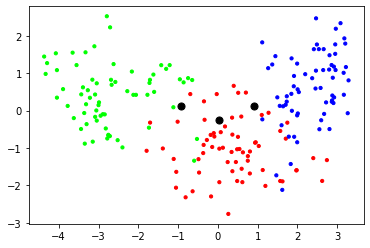

In [11]:
import matplotlib.pyplot as plt
from sklearn import decomposition as deco
from matplotlib.colors import ListedColormap

def transformData(features, PCevecs):
    return np.dot(features, PCevecs[:,0:2])

#transformed = transformData(normalized, PCevecs)
transformed = transformData(normalized, PCevecs)
#transCent = transformData(testClust, PCevecs1)
transCent = transformData(centroids2, PCevecs1)
print(transformed)

def __visualizeLabels(features, referenceLabels, centroids):
    plt.figure()
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    y = referenceLabels

    plt.scatter(features[:, 0], features[:, 1], c = y, cmap = cmap_bold, s=10)
    plt.scatter(centroids[:,0], centroids[:,1], color="black", s=50)
    #plt.xlim(features[:, 0].min() - 0.1, features[:, 0].max() + 0.1)
    #plt.ylim(features[:, 1].min() - 0.1, features[:, 1].max() + 0.1)
    plt.show()
    t = 0
    
#print(transCent)

__visualizeLabels(transformed, X, transCent)